# Further Visualisation of HadUK Data

### Importing

In [13]:
!conda install -c conda-forge netcdf4 xarray dask matplotlib numpy pandas -y

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import netCDF4 as nc
import dask

Channels:
 - conda-forge
 - forge
 - defaults
Platform: osx-64
Solving environment: done

# All requested packages already installed.



In [14]:
#Opening a single netCDF file
data = xr.open_dataset(r"/Users/maxMax/Desktop/Datasets/12km/tas/mon/v20240514/tas_hadukgrid_uk_12km_mon_188401-188412.nc")

#Opening all the netCDF files in a directory and merging them into one variable - must use /*.cd after folder name to extract all netCDF files in folder.
data_temp = xr.open_mfdataset(r"/Users/maxMax/Desktop/Datasets/12km/tas/mon/v20240514/*.nc", parallel=False) #Always set parallel to False when using open_mfdataset. There is a bug in the package.

data_one_year = data.tas.values
data_all_months = data_temp.tas.values

# Mean Temperature

### Opening Files

## Months and Seasons Data

Winter data length: 140
Spring data length: 140
Summer data length: 140
Autumn data length: 140


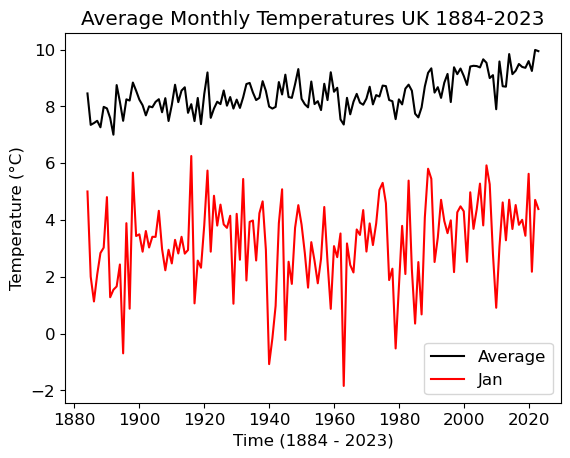

In [51]:
from skimage.measure import block_reduce

time_index = pd.to_datetime(data_temp.time.values)#converting the time coords into a panda datatframe so that they're easy to filter
temp = block_reduce(data_all_months, block_size=(12,1,1), func=np.mean, cval=np.mean(data_all_months))

jan_data = data_temp.sel(time=time_index.month == 1)
feb_data = data_temp.sel(time=time_index.month == 2)
mar_data = data_temp.sel(time=time_index.month == 3)
apr_data = data_temp.sel(time=time_index.month == 4)
may_data = data_temp.sel(time=time_index.month == 5)
jun_data = data_temp.sel(time=time_index.month == 6)
jul_data = data_temp.sel(time=time_index.month == 7)
aug_data = data_temp.sel(time=time_index.month == 8)
sep_data = data_temp.sel(time=time_index.month == 9)
oct_data = data_temp.sel(time=time_index.month == 10)
nov_data = data_temp.sel(time=time_index.month == 11)
dec_data = data_temp.sel(time=time_index.month == 12)

temp_jan = jan_data.tas.values
temp_feb = feb_data.tas.values
temp_mar = mar_data.tas.values
temp_apr = apr_data.tas.values
temp_may = may_data.tas.values
temp_jun = jun_data.tas.values
temp_jul = jul_data.tas.values
temp_aug = aug_data.tas.values
temp_sep = sep_data.tas.values
temp_oct = oct_data.tas.values
temp_nov = nov_data.tas.values
temp_dec = dec_data.tas.values

temp_mean = np.nanmean(temp, axis=(1, 2))
temp_mean_jan = np.nanmean(temp_jan, axis=(1, 2))
temp_mean_feb = np.nanmean(temp_feb, axis=(1, 2))
temp_mean_mar = np.nanmean(temp_mar, axis=(1, 2))
temp_mean_apr = np.nanmean(temp_apr, axis=(1, 2))
temp_mean_may = np.nanmean(temp_may, axis=(1, 2))
temp_mean_jun = np.nanmean(temp_jun, axis=(1, 2))
temp_mean_jul = np.nanmean(temp_jul, axis=(1, 2))
temp_mean_aug = np.nanmean(temp_aug, axis=(1, 2))
temp_mean_sep = np.nanmean(temp_sep, axis=(1, 2))
temp_mean_oct = np.nanmean(temp_oct, axis=(1, 2))
temp_mean_nov = np.nanmean(temp_nov, axis=(1, 2))
temp_mean_dec = np.nanmean(temp_dec, axis=(1, 2))

time_index = pd.to_datetime(data_temp.time.values)#convert time to pandas DatetimeIndex

year_array = np.array(time_index.year)  #need to create mutable year and month arrrays so convert to a NumPy array for mutability
month_array = np.array(time_index.month)

year_array_shifted = year_array.copy() #create copy of year array so it doesnt aaffect the original
year_array_shifted[month_array == 12] += 1 #shifting december from previous year to current year

winter_mask = (month_array == 12) | (month_array == 1) | (month_array == 2) #create boolean mask to identify these indices as the months in winter
winter_data = data_temp.sel(time=winter_mask)  #apply the mask to the the dataaset to get only inter months
winter_years = year_array_shifted[winter_mask]  #apply mask to shifted years to get tthe years for the selected months
winter_data = winter_data.assign_coords(winter_year=("time", winter_years)) #assign a coordinate to winter data called winter_year linking each winter month to its associated winter yeaar

winter_grouped = winter_data.groupby("winter_year").mean(dim="time", skipna=True) #now group by the new years
winter_grouped = winter_grouped.isel(winter_year=slice(0, -1))#remove last entry because it's only december
temp_mean_winter = np.nanmean(winter_grouped.tas.values, axis=(1, 2)) #average over these values for each year to get mean winter temp

#now doing practiucally the same for other seasons without having to shift years:
spring_data = data_temp.sel(
    time=(time_index.month == 3) | (time_index.month == 4) | (time_index.month == 5)
)
summer_data = data_temp.sel(
    time=(time_index.month == 6) | (time_index.month == 7) | (time_index.month == 8)
)
autumn_data = data_temp.sel(
    time=(time_index.month == 9) | (time_index.month == 10) | (time_index.month == 11)
)

spring_grouped = spring_data.groupby("time.year").mean(dim="time", skipna=True)
summer_grouped = summer_data.groupby("time.year").mean(dim="time", skipna=True)
autumn_grouped = autumn_data.groupby("time.year").mean(dim="time", skipna=True)

temp_mean_spring = np.nanmean(spring_grouped.tas.values, axis=(1, 2))
temp_mean_summer = np.nanmean(summer_grouped.tas.values, axis=(1, 2))
temp_mean_autumn = np.nanmean(autumn_grouped.tas.values, axis=(1, 2))

#checking lengths for debugging
print(f"Winter data length: {len(temp_mean_winter)}")
print(f"Spring data length: {len(temp_mean_spring)}")
print(f"Summer data length: {len(temp_mean_summer)}")
print(f"Autumn data length: {len(temp_mean_autumn)}")

time = np.arange(1884,2024)

plt.plot(time, temp_mean, 'black', label = 'Average')
plt.plot(time, temp_mean_jan, 'red', label = 'Jan')
#plt.plot(time, temp_mean_feb, 'orange', label = 'Feb')
#plt.plot(time, temp_mean_mar, 'yellow', label = 'Mar')
#plt.plot(time, temp_mean_apr, 'green', label = 'Apr')
#plt.plot(time, temp_mean_may, 'blue', label = 'May')
#plt.plot(time, temp_mean_jun, 'navy', label = 'Jun')
#plt.plot(time, temp_mean_jul, 'indigo', label = 'Jul')
#plt.plot(time, temp_mean_aug, 'violet', label = 'Aug')
#plt.plot(time, temp_mean_sep, 'black', label = 'Sep')
#plt.plot(time, temp_mean_oct, 'grey', label = 'Oct')
#plt.plot(time, temp_mean_nov, 'cyan', label = 'Nov')
#plt.plot(time, temp_mean_dec, 'salmon', label = 'Dec')
plt.xlabel('Time (1884 - 2023)')
plt.ylabel('Temperature (°C)')
plt.title('Average Monthly Temperatures UK 1884-2023')
plt.rcParams.update({'font.size': 12})
plt.legend()
plt.show()

## Grid Cell Specification

The following allows for the visualisation of temperature data in specific grid cells (specified by BNG latitude and longitude coordinates):

Nearest index for longitude: 57
Nearest index for latitude: 29


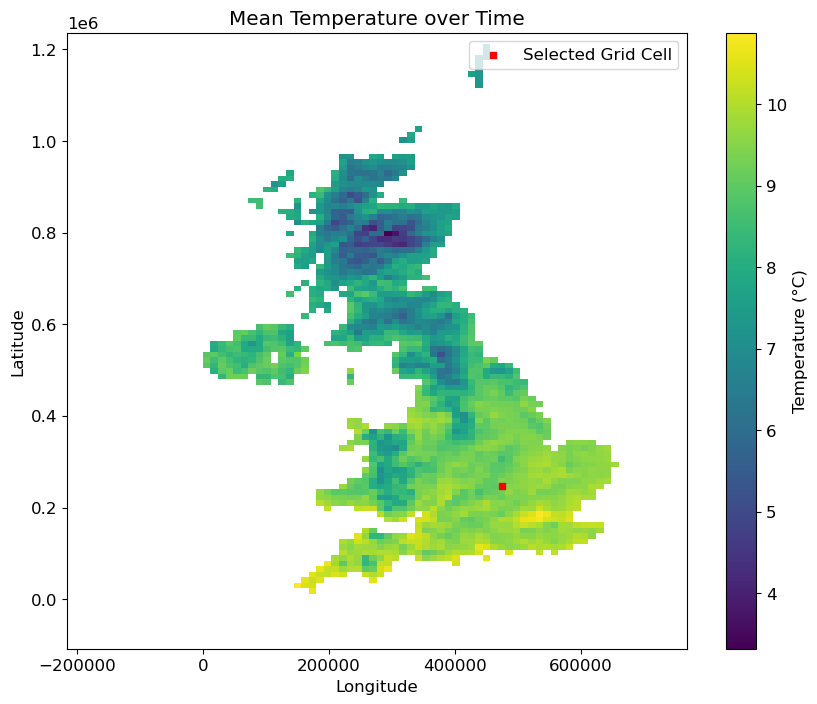

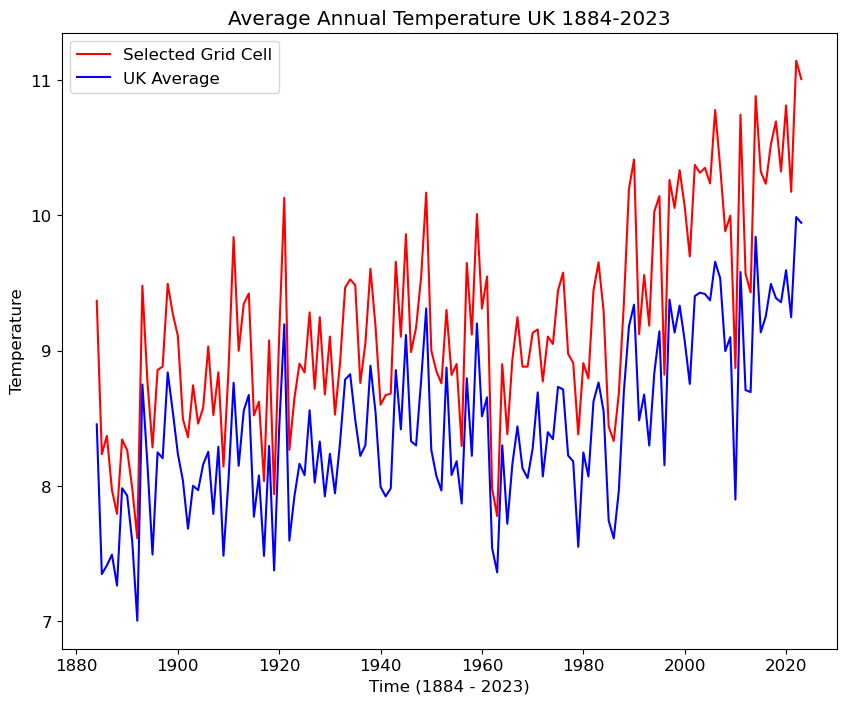

In [29]:
target_lon = 470000
target_lat = 250000

mean_temp = np.mean(data_all_months, axis=0) #mean temperature for all grid cells

lons = data_temp.projection_x_coordinate.values #creates an array of longitudes and latitudes (x and y coords) contained in dataset
lats = data_temp.projection_y_coordinate.values #using data_temp because this is a single cd file so contains single value for grid coordinates

lon_mesh, lat_mesh = np.meshgrid(lons, lats) #creates the meshgrid of lons and lats which transforms the 2 1D arrays into 2D arrays so that there is a workable coordinaate system

selected_point = data_temp.sel(projection_x_coordinate=target_lon, #using .sel method to select the grid cell with coordinates closest to the inputted long and lat.
                               projection_y_coordinate=target_lat, #projection_x/y_coordinate is the variable in the dataset that contains the x and y coords usinig the BNG system
                               method='nearest')

nearest_lon_idx = np.abs(lons - target_lon).argmin() #subtracts the inputted long/lat from every other value and creates an array of differnces between them, np.abs then takes the abs value of these and argmin returns the index of the grid cell witht the shortest distance from the target value
nearest_lat_idx = np.abs(lats - target_lat).argmin() #this is used because when selecting a grid cell for plotting later, it's easier to use the index

print(f"Nearest index for longitude: {nearest_lon_idx}") #checking which indicies have been selected
print(f"Nearest index for latitude: {nearest_lat_idx}")

plt.figure(figsize=(10, 8))
plt.pcolormesh(lon_mesh, lat_mesh, mean_temp, cmap='viridis', shading='auto') #plots the meshgrid creaated previously with a colourbar etc
cbar = plt.colorbar()
cbar.set_label("Temperature (°C)")

plt.scatter(lon_mesh[nearest_lat_idx, nearest_lon_idx], #overlays the meshgrid plot with a scatter plot containing one point plotted at the coords of the targeted grid cell (marker set to square for aesthetic purposes to make it clearer we are selecting a crid cell, does not highlight the grid cell specifically)
            lat_mesh[nearest_lat_idx, nearest_lon_idx], #using the indices to select the correct coordinate from the 2D arrays
            color='red', s=25, marker='s', label='Selected Grid Cell')
plt.xlabel('Longitude') #labelling the plot, adding legend to signify the highlighted region is the selected grid cell
plt.ylabel('Latitude')
plt.title('Mean Temperature over Time')
plt.legend()
plt.show()

#variables can be converted to numpy arrays
data_one_year = data.tas.values
data_all_months = data_temp.tas.values

#block reduce cuts the data into blocks and applies a function to each block (the function is the mean and the block size is 12 months)
temp = block_reduce(data_all_months[:,nearest_lat_idx, nearest_lon_idx], block_size=(12), func=np.mean, cval=np.mean(data_all_months))
temp_all = block_reduce(data_all_months, block_size=(12,1,1), func=np.mean, cval=np.mean(data_all_months))#(12,1,1) means we group the time dimension into blocks of 12 months 91 year) but 1 (y) and 1 (x) means that we retain the spatial dimensions alreaady present in the data, i.e. there is no grouping of spatial data

#data is then averaged over the coordinate dimensions with nanmean being used to ignore NaN values
temp_mean2 = np.nanmean(temp_all, axis=(1, 2)) #temp_all has already created a grid of average temperatures in 12 month segments, so here i set axis=(1,2) so that the nanmean function acts only over the x 910 and y (2) dimensions and does not try to average again over time (0)
time = np.arange(1884,2024)

plt.figure(figsize=(10, 8))
plt.plot(time, temp, 'r', label='Selected Grid Cell')
plt.plot(time, temp_mean2, 'b', label='UK Average')
plt.xlabel('Time (1884 - 2023)')
plt.ylabel('Temperature')
plt.title('Average Annual Temperature UK 1884-2023')
plt.rcParams.update({'font.size': 12})
plt.legend()
plt.show()

## Regression Function

In [53]:
from matplotlib.lines import Line2D
from scipy.optimize import curve_fit

def piecewise_linear_fixed_split(x, slope1, intercept1, slope2):
    return np.where(x < split_year, slope1 * x + intercept1, slope2 * (x - split_year) + (slope1 * split_year + intercept1))


def plot_with_regression(time, data, color, label):
    p0 = [0.1, np.mean(data), 0.1]#initial guess for slope 1, intercept 1 and slope 2

    params, _ = curve_fit(piecewise_linear_fixed_split, time, data, p0, maxfev=10000)#fit piecewise liner model to data (increase maaxfev to avod runtime error)
    slope1, intercept1, slope2 = params

    y_fit = piecewise_linear_fixed_split(time, slope1, intercept1, slope2)#calc fitted vaalues for time range

    plt.plot(time, data, color=color, marker='o', label=label)#plot ctual data and segmented fit
    plt.plot(time, y_fit, color=color, linestyle='--', label=f'{label} Segmented Fit')

    print(f"{label} Pre-{split_year} Slope: {slope1:.6f}")#print slopes and intercepts
    print(f"{label} Post-{split_year} Slope: {slope2:.6f}")

    pre_indices = time < split_year#z-scores
    post_indices = time >= split_year
    residuals_pre = data[pre_indices] - (slope1 * time[pre_indices] + intercept1)
    residuals_post = data[post_indices] - (slope2 * (time[post_indices] - split_year) + (slope1 * split_year + intercept1))
    s_err_pre = np.sqrt(np.sum(residuals_pre**2) / (len(time[pre_indices]) - 2))
    s_err_post = np.sqrt(np.sum(residuals_post**2) / (len(time[post_indices]) - 2))
    x_mean_pre = np.mean(time[pre_indices])
    x_mean_post = np.mean(time[post_indices])
    se_slope_pre = s_err_pre / np.sqrt(np.sum((time[pre_indices] - x_mean_pre)**2))
    se_slope_post = s_err_post / np.sqrt(np.sum((time[post_indices] - x_mean_post)**2))
    z_score_pre = slope1 / se_slope_pre
    z_score_post = slope2 / se_slope_post

    print(f"{label} Pre-{split_year} Z-Score: {z_score_pre:.6f}")
    print(f"{label} Post-{split_year} Z-Score: {z_score_post:.6f}")
    
    coeffs_total = np.polyfit(time, data, 1) #fitting entire dataset
    slope_total, intercept_total = coeffs_total
    y_fit_total = np.polyval(coeffs_total, time)
    plt.plot(time, y_fit_total, color=color, linestyle='-', linewidth=1.5)
    residuals_total = data - y_fit_total
    N_total = len(time)
    s_err_total = np.sqrt(np.sum(residuals_total**2) / (N_total - 2))
    x_mean_total = np.mean(time)
    se_slope_total = s_err_total / np.sqrt(np.sum((time - x_mean_total)**2))
    z_score_total = slope_total / se_slope_total
    print(f"{label} Total Gradient (Slope): {slope_total:.6f}")
    print(f"{label} Total Z-Score: {z_score_total:.6f}")

    percentage_change = ((slope2 - slope1) / abs(slope2) * 100)#calculate changepoint gradients percentage change
    print(f"Percentage change in gradient from segment pre to post-{split_year}: {percentage_change:.2f}%")

    plt.legend()
    plt.xlabel("Year")
    plt.ylabel("Data Value")
    plt.title(f"{label} with Piecewise Regression")


## Coastal and Inland

The following does the same analysis for coastal vs inland:

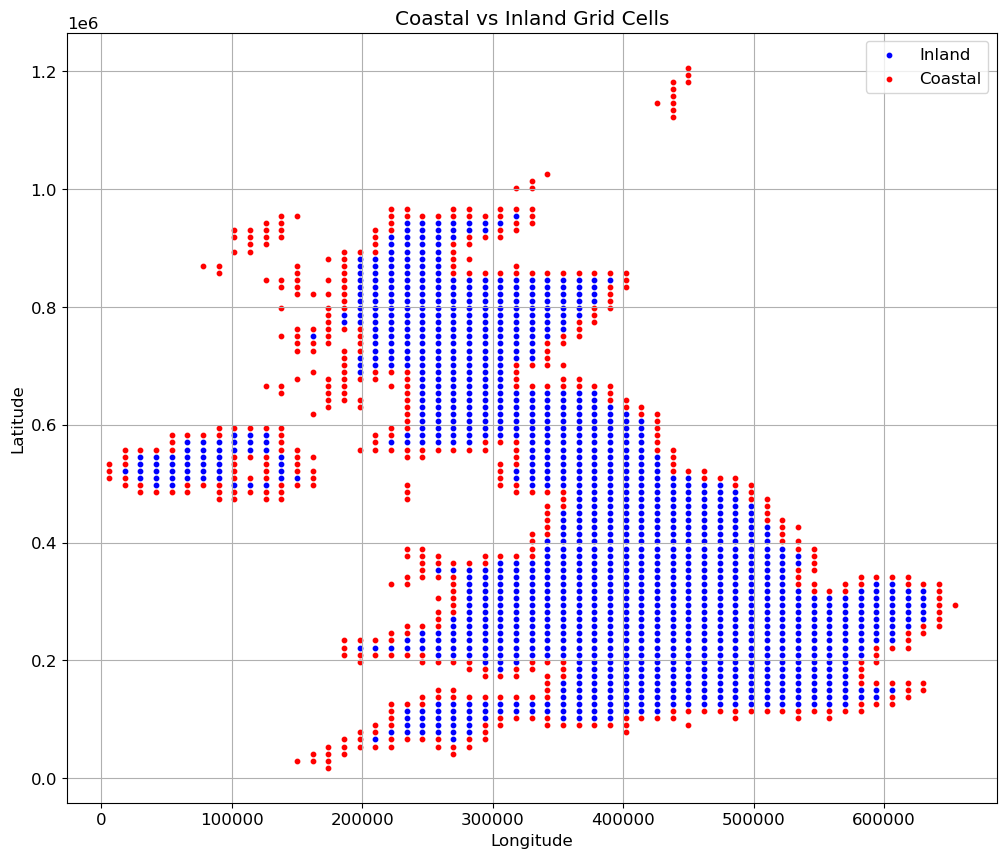

Inland Pre-1990 Slope: 0.005966
Inland Post-1990 Slope: 0.035305
Inland Pre-1990 Z-Score: 4.052642
Inland Post-1990 Z-Score: 4.309721
Inland Total Gradient (Slope): 0.010201
Inland Total Z-Score: 9.806560
Percentage change in gradient from segment pre to post-1990: 83.10%
Coastal Pre-1990 Slope: 0.004742
Coastal Post-1990 Slope: 0.032426
Coastal Pre-1990 Z-Score: 3.466083
Coastal Post-1990 Z-Score: 4.364754
Coastal Total Gradient (Slope): 0.008738
Coastal Total Z-Score: 9.063866
Percentage change in gradient from segment pre to post-1990: 85.38%
UK Average Pre-1990 Slope: 0.005588
UK Average Post-1990 Slope: 0.034401
UK Average Pre-1990 Z-Score: 3.887579
UK Average Post-1990 Z-Score: 4.331148
UK Average Total Gradient (Slope): 0.009747
UK Average Total Z-Score: 9.602481
Percentage change in gradient from segment pre to post-1990: 83.76%


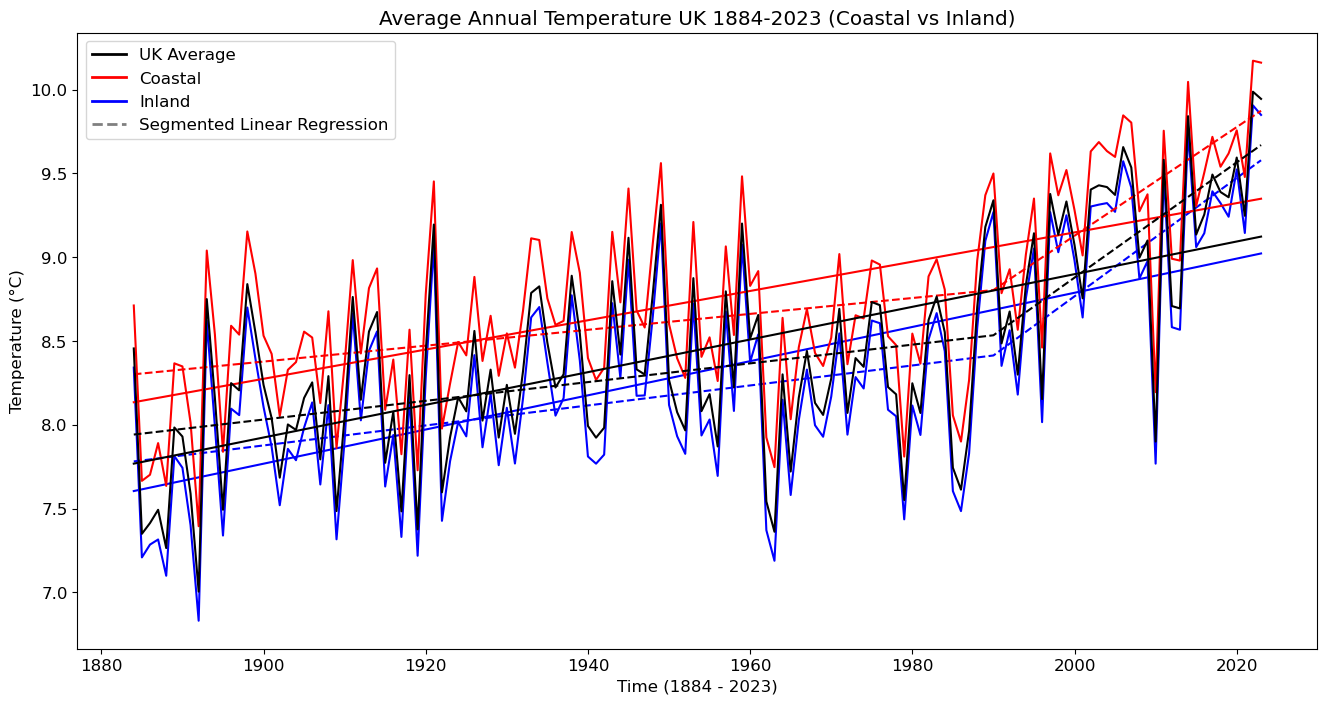

In [31]:
import numpy as np
import xarray as xr
from scipy.ndimage import convolve
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data_temp = xr.open_mfdataset(r"/Users/maxMax/Desktop/Datasets/12km/tas/mon/v20240514/*.nc", parallel=False)
data_all_months = data_temp.tas.values
temp_all = block_reduce(data_all_months, block_size=(12, 1, 1), func=np.mean, cval=np.nan)
nan_mask = np.isnan(temp_all[0]) #mask nans

kernel = np.array([[1, 1, 1],#define convolutional kernel 3x3
                   [1, 0, 1],
                   [1, 1, 1]])


adjacent_nan_count = convolve(nan_mask.astype(int), kernel, mode="constant", cval=1)#counting adjacent nan cells for each grid cell using kernel

inland_mask = (adjacent_nan_count == 0) & ~nan_mask#inland

coastal_mask = (adjacent_nan_count > 0) & ~nan_mask#coastal

inland_temp = np.nanmean(temp_all[:, inland_mask], axis=1)#abverage over time for inland, coastal and all UK
coastal_temp = np.nanmean(temp_all[:, coastal_mask], axis=1)
uk_avg_temp = np.nanmean(temp_all, axis=(1, 2))

time = np.arange(1884, 2024)
lons = data_temp.projection_x_coordinate.values#coordinates
lats = data_temp.projection_y_coordinate.values
lon_mesh, lat_mesh = np.meshgrid(lons, lats)

#plotting
plt.figure(figsize=(12, 10))
plt.scatter(lon_mesh[inland_mask], lat_mesh[inland_mask], c="blue", s=10, label="Inland")
plt.scatter(lon_mesh[coastal_mask], lat_mesh[coastal_mask], c="red", s=10, label="Coastal")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Coastal vs Inland Grid Cells")
plt.legend()
plt.grid(True)
plt.show()

#plot regression results
plt.figure(figsize=(16, 8))
plot_with_regression(time, inland_temp, label="Inland", color="blue")
plot_with_regression(time, coastal_temp, label="Coastal", color="red")
plot_with_regression(time, uk_avg_temp, label="UK Average", color="black")

plt.xlabel('Time (1884 - 2023)')
plt.ylabel('Temperature (°C)')
plt.title('Average Annual Temperature UK 1884-2023 (Coastal vs Inland)')

#better way of adding a legend
legend_elements = [
    Line2D([0], [0], color='black', lw=2, label='UK Average'),
    Line2D([0], [0], color='red', lw=2, label='Coastal'),
    Line2D([0], [0], color='blue', lw=2, label='Inland'),
    
    Line2D([0], [0], color='gray', linestyle='--', lw=2, label='Segmented Linear Regression'),

]
plt.legend(handles=legend_elements)
plt.show()



## North, South, East and West

North Average Pre-1990 Slope: 0.004495
North Average Post-1990 Slope: 0.029049
North Average Pre-1990 Z-Score: 3.231053
North Average Post-1990 Z-Score: 3.953873
North Average Total Gradient (Slope): 0.008039
North Average Total Z-Score: 8.392576
Percentage change in gradient from segment pre to post-1990: 84.53%
South Average Pre-1990 Slope: 0.006192
South Average Post-1990 Slope: 0.037181
South Average Pre-1990 Z-Score: 4.109852
South Average Post-1990 Z-Score: 4.385179
South Average Total Gradient (Slope): 0.010665
South Average Total Z-Score: 9.949821
Percentage change in gradient from segment pre to post-1990: 83.35%
UK Average Pre-1990 Slope: 0.005588
UK Average Post-1990 Slope: 0.034401
UK Average Pre-1990 Z-Score: 3.887579
UK Average Post-1990 Z-Score: 4.331148
UK Average Total Gradient (Slope): 0.009747
UK Average Total Z-Score: 9.602481
Percentage change in gradient from segment pre to post-1990: 83.76%


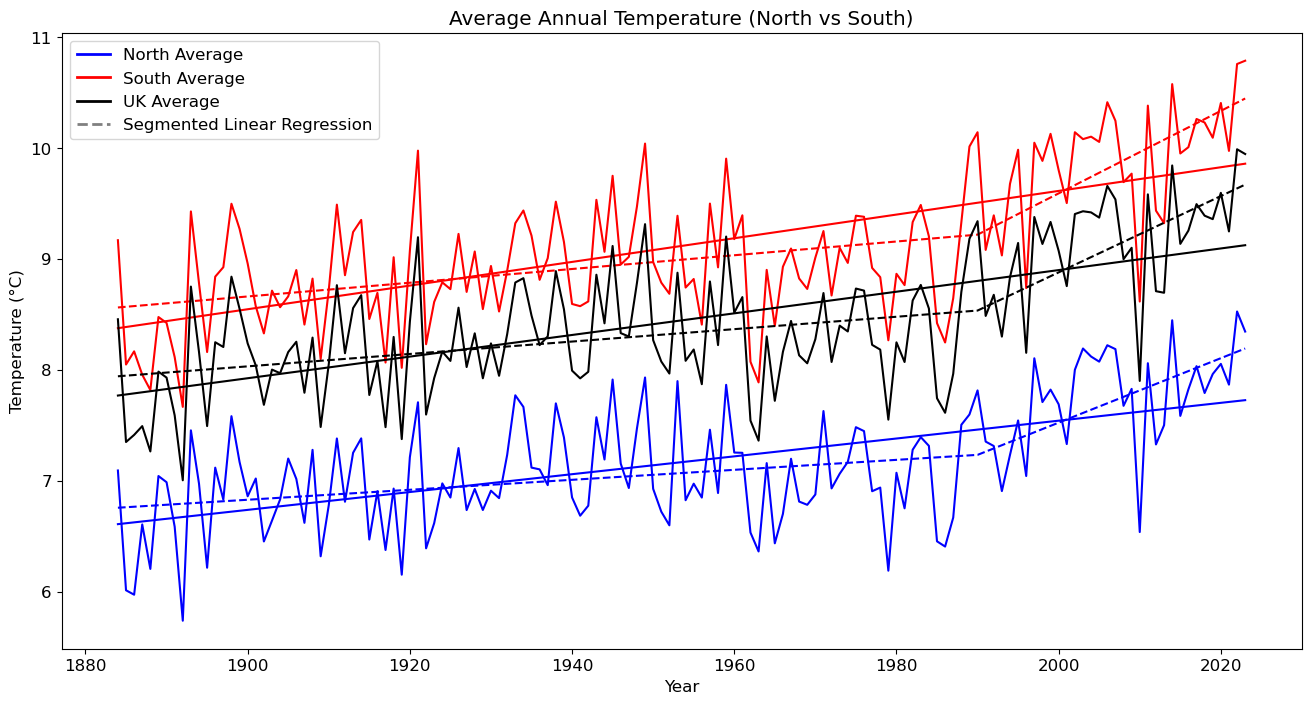

West Average Pre-1990 Slope: 0.003798
West Average Post-1990 Slope: 0.028993
West Average Pre-1990 Z-Score: 2.811977
West Average Post-1990 Z-Score: 4.026929
West Average Total Gradient (Slope): 0.007435
West Average Total Z-Score: 7.926750
Percentage change in gradient from segment pre to post-1990: 86.90%
East Average Pre-1990 Slope: 0.006402
East Average Post-1990 Slope: 0.036828
East Average Pre-1990 Z-Score: 4.271560
East Average Post-1990 Z-Score: 4.391535
East Average Total Gradient (Slope): 0.010794
East Average Total Z-Score: 10.154125
Percentage change in gradient from segment pre to post-1990: 82.62%
UK Average Pre-1990 Slope: 0.005588
UK Average Post-1990 Slope: 0.034401
UK Average Pre-1990 Z-Score: 3.887579
UK Average Post-1990 Z-Score: 4.331148
UK Average Total Gradient (Slope): 0.009747
UK Average Total Z-Score: 9.602481
Percentage change in gradient from segment pre to post-1990: 83.76%


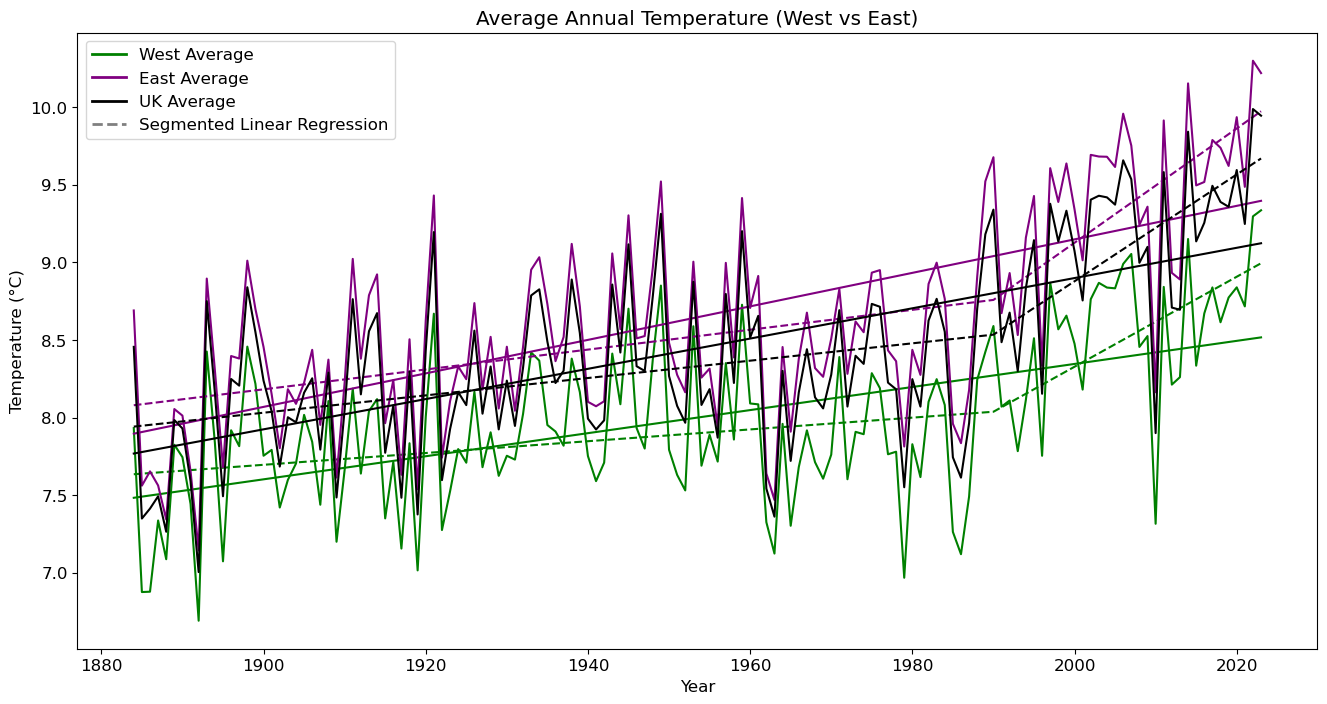

In [32]:
lat_midpoint = np.mean(lats) #getting midpoint of latitudes
north_indices = lats >= lat_midpoint #defining north and south indices
south_indices = lats < lat_midpoint

temp_north = data_temp.tas[:, north_indices, :].mean(dim=('projection_y_coordinate', 'projection_x_coordinate')) #monthly mean for north and south
temp_south = data_temp.tas[:, south_indices, :].mean(dim=('projection_y_coordinate', 'projection_x_coordinate')) #takes temp. values from N/S indices and then averages over the spatial dimension

lon_midpoint = np.mean(lons) #same for E and W
west_indices = lons <= lon_midpoint
east_indices = lons > lon_midpoint
temp_west = data_temp.tas[:, :, west_indices].mean(dim=('projection_y_coordinate', 'projection_x_coordinate'))
temp_east = data_temp.tas[:, :, east_indices].mean(dim=('projection_y_coordinate', 'projection_x_coordinate'))

temp_north_annual = block_reduce(temp_north.values, block_size=(12,), func=np.nanmean) #uses block reduce to average over annual periods (temporal dimension)
temp_south_annual = block_reduce(temp_south.values, block_size=(12,), func=np.nanmean)
temp_west_annual = block_reduce(temp_west.values, block_size=(12,), func=np.nanmean)
temp_east_annual = block_reduce(temp_east.values, block_size=(12,), func=np.nanmean)

plt.figure(figsize=(16, 8))#plotting N/S
plot_with_regression(time, temp_north_annual, 'blue', 'North Average')
plot_with_regression(time, temp_south_annual, 'red', 'South Average')
plot_with_regression(time, temp_mean2, 'black', 'UK Average')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Average Annual Temperature (North vs South)')
legend_elements = [
    Line2D([0], [0], color='blue', lw=2, label='North Average'),
    Line2D([0], [0], color='red', lw=2, label='South Average'),
    Line2D([0], [0], color='black', lw=2, label='UK Average'),
    Line2D([0], [0], color='gray', linestyle='--', lw=2, label='Segmented Linear Regression'),
]
plt.legend(handles=legend_elements)
plt.show()

plt.figure(figsize=(16, 8))#plotting E/W
plot_with_regression(time, temp_west_annual, 'green', 'West Average')
plot_with_regression(time, temp_east_annual, 'purple', 'East Average')
plot_with_regression(time, temp_mean2, 'black', 'UK Average')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Average Annual Temperature (West vs East)')
legend_elements = [
    Line2D([0], [0], color='green', lw=2, label='West Average'),
    Line2D([0], [0], color='purple', lw=2, label='East Average'),
    Line2D([0], [0], color='black', lw=2, label='UK Average'),
    Line2D([0], [0], color='gray', linestyle='--', lw=2, label='Segmented Linear Regression'),
]
plt.legend(handles=legend_elements)
plt.show()


## Seasonal

The following allows for linear fit comparison between averages acorss the whole UK by month:

Winter Pre-1990 Slope: 0.003225
Winter Post-1990 Slope: 0.035330
Winter Pre-1990 Z-Score: 0.945171
Winter Post-1990 Z-Score: 2.056813
Winter Total Gradient (Slope): 0.007859
Winter Total Z-Score: 3.526054
Percentage change in gradient from segment pre to post-1990: 90.87%
Spring Pre-1990 Slope: 0.006862
Spring Post-1990 Slope: 0.031416
Spring Pre-1990 Z-Score: 3.008742
Spring Post-1990 Z-Score: 2.304725
Spring Total Gradient (Slope): 0.010406
Spring Total Z-Score: 6.684683
Percentage change in gradient from segment pre to post-1990: 78.16%
Summer Pre-1990 Slope: 0.004181
Summer Post-1990 Slope: 0.036303
Summer Pre-1990 Z-Score: 1.806381
Summer Post-1990 Z-Score: 3.441786
Summer Total Gradient (Slope): 0.008818
Summer Total Z-Score: 5.811588
Percentage change in gradient from segment pre to post-1990: 88.48%
Autumn Pre-1990 Slope: 0.008003
Autumn Post-1990 Slope: 0.033160
Autumn Pre-1990 Z-Score: 3.589760
Autumn Post-1990 Z-Score: 2.487550
Autumn Total Gradient (Slope): 0.011634
Autumn 

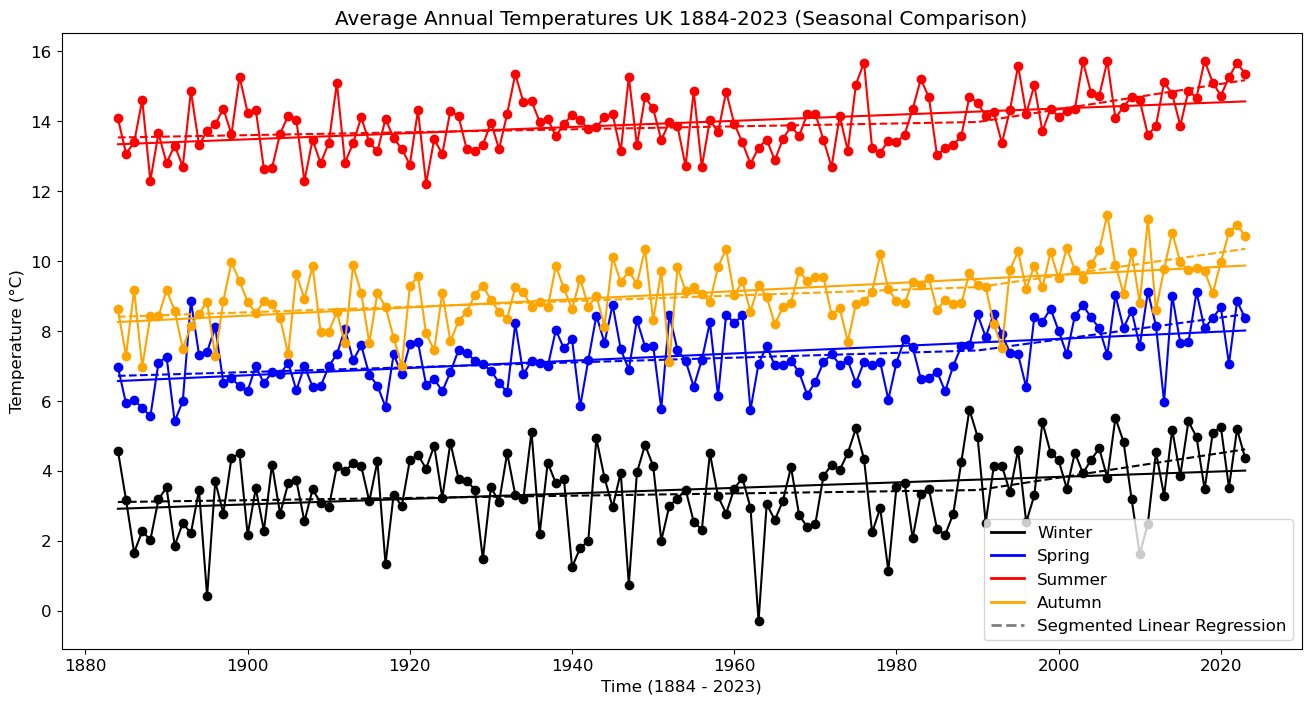

In [55]:

plt.figure(figsize=(16, 8))

plot_with_regression(time, temp_mean_winter, 'black', 'Winter') #linear fit for average temperature

plot_with_regression(time, temp_mean_spring, 'blue', 'Spring') #linear fit for january temperature

plot_with_regression(time, temp_mean_summer, 'red', 'Summer') #linear fit for february temperature

plot_with_regression(time, temp_mean_autumn, 'orange', 'Autumn') #linear fit for february temperature


plt.xlabel('Time (1884 - 2023)')
plt.ylabel('Temperature (°C)')
plt.title('Average Annual Temperatures UK 1884-2023 (Seasonal Comparison)')
plt.rcParams.update({'font.size': 12})

legend_elements = [
    Line2D([0], [0], color='black', lw=2, label='Winter'),
    Line2D([0], [0], color='blue', lw=2, label='Spring'),
    Line2D([0], [0], color='red', lw=2, label='Summer'),
    Line2D([0], [0], color='orange', lw=2, label='Autumn'),
    
    Line2D([0], [0], color='gray', linestyle='--', lw=2, label='Segmented Linear Regression'),
]
plt.legend(handles=legend_elements)
plt.show()


# Rainfall:

## Seasonal

Winter data length: 188
Spring data length: 188
Summer data length: 188
Autumn data length: 188
Winter Pre-1990 Slope: 0.118736
Winter Post-1990 Slope: 0.428391
Winter Pre-1990 Z-Score: 3.073987
Winter Post-1990 Z-Score: 0.815807
Winter Total Gradient (Slope): 0.144724
Winter Total Z-Score: 4.678237
Percentage change in gradient from segment pre to post-1990: 72.28%
Spring Pre-1990 Slope: 0.094949
Spring Post-1990 Slope: -0.108814
Spring Pre-1990 Z-Score: 3.756552
Spring Post-1990 Z-Score: -0.525855
Spring Total Gradient (Slope): 0.077848
Spring Total Z-Score: 4.264156
Percentage change in gradient from segment pre to post-1990: -187.26%
Summer Pre-1990 Slope: -0.048048
Summer Post-1990 Slope: 0.320272
Summer Pre-1990 Z-Score: -1.510335
Summer Post-1990 Z-Score: 0.877940
Summer Total Gradient (Slope): -0.017137
Summer Total Z-Score: -0.700170
Percentage change in gradient from segment pre to post-1990: 115.00%
Autumn Pre-1990 Slope: 0.059110
Autumn Post-1990 Slope: 0.339048
Autumn Pre-

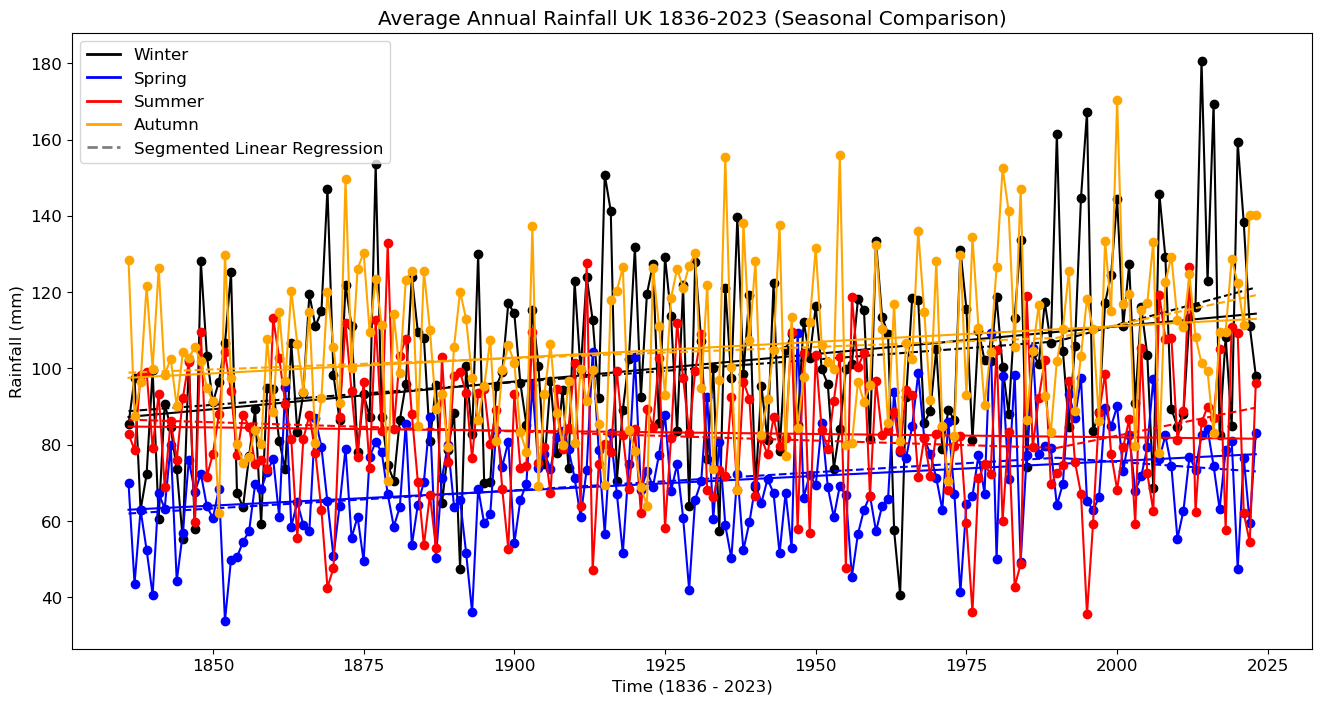

In [60]:
#Opening a single netCDF file
data = xr.open_dataset(r"/Users/maxMax/Desktop/Datasets/12km/rainfall/mon/v20240514/rainfall_hadukgrid_uk_12km_mon_183601-183612.nc")

#Opening all the netCDF files in a directory and merging them into one variable - must use /*.cd after folder name to extract all netCDF files in folder.
data_rain = xr.open_mfdataset(r"/Users/maxMax/Desktop/datasets/12km/rainfall/mon/v20240514/*.nc", parallel=False) #Always set parallel to False when using open_mfdarainfallet. There is a bug in the package.

data_one_year = data.rainfall.values
data_all_months = data_rain.rainfall.values

time_index = pd.to_datetime(data_rain.time.values) #converting the time coords into a panda datatframe so that they're easy to filter
rain = block_reduce(data_all_months, block_size=(12,1,1), func=np.mean, cval=np.mean(data_all_months))

jan_data = data_rain.sel(time=time_index.month == 1)
feb_data = data_rain.sel(time=time_index.month == 2)
mar_data = data_rain.sel(time=time_index.month == 3)
apr_data = data_rain.sel(time=time_index.month == 4)
may_data = data_rain.sel(time=time_index.month == 5)
jun_data = data_rain.sel(time=time_index.month == 6)
jul_data = data_rain.sel(time=time_index.month == 7)
aug_data = data_rain.sel(time=time_index.month == 8)
sep_data = data_rain.sel(time=time_index.month == 9)
oct_data = data_rain.sel(time=time_index.month == 10)
nov_data = data_rain.sel(time=time_index.month == 11)
dec_data = data_rain.sel(time=time_index.month == 12)

rain_jan = jan_data.rainfall.values
rain_feb = feb_data.rainfall.values
rain_mar = mar_data.rainfall.values
rain_apr = apr_data.rainfall.values
rain_may = may_data.rainfall.values
rain_jun = jun_data.rainfall.values
rain_jul = jul_data.rainfall.values
rain_aug = aug_data.rainfall.values
rain_sep = sep_data.rainfall.values
rain_oct = oct_data.rainfall.values
rain_nov = nov_data.rainfall.values
rain_dec = dec_data.rainfall.values

rain_mean = np.nanmean(rain, axis=(1, 2))
rain_mean_jan = np.nanmean(rain_jan, axis=(1, 2))
rain_mean_feb = np.nanmean(rain_feb, axis=(1, 2))
rain_mean_mar = np.nanmean(rain_mar, axis=(1, 2))
rain_mean_apr = np.nanmean(rain_apr, axis=(1, 2))
rain_mean_may = np.nanmean(rain_may, axis=(1, 2))
rain_mean_jun = np.nanmean(rain_jun, axis=(1, 2))
rain_mean_jul = np.nanmean(rain_jul, axis=(1, 2))
rain_mean_aug = np.nanmean(rain_aug, axis=(1, 2))
rain_mean_sep = np.nanmean(rain_sep, axis=(1, 2))
rain_mean_oct = np.nanmean(rain_oct, axis=(1, 2))
rain_mean_nov = np.nanmean(rain_nov, axis=(1, 2))
rain_mean_dec = np.nanmean(rain_dec, axis=(1, 2))

time_index = pd.to_datetime(data_rain.time.values)

year_array = np.array(time_index.year)
month_array = np.array(time_index.month)
year_array_shifted = year_array.copy()
year_array_shifted[month_array == 12] += 1

winter_rain_mask = (month_array == 12) | (month_array == 1) | (month_array == 2)
winter_rain_data = data_rain.sel(time=winter_rain_mask)
winter_years = year_array_shifted[winter_rain_mask]
winter_rain_data = winter_rain_data.assign_coords(winter_year=("time", winter_years))

winter_grouped = winter_rain_data.groupby("winter_year").mean(dim="time", skipna=True)
winter_grouped = winter_grouped.isel(winter_year=slice(0, -1))
rain_mean_winter = np.nanmean(winter_grouped.rainfall.values, axis=(1, 2))

spring_rain_data = data_rain.sel(
    time=(time_index.month == 3) | (time_index.month == 4) | (time_index.month == 5)
)
summer_rain_data = data_rain.sel(
    time=(time_index.month == 6) | (time_index.month == 7) | (time_index.month == 8)
)
autumn_rain_data = data_rain.sel(
    time=(time_index.month == 9) | (time_index.month == 10) | (time_index.month == 11)
)

spring_grouped = spring_rain_data.groupby("time.year").mean(dim="time", skipna=True)
summer_grouped = summer_rain_data.groupby("time.year").mean(dim="time", skipna=True)
autumn_grouped = autumn_rain_data.groupby("time.year").mean(dim="time", skipna=True)

rain_mean_spring = np.nanmean(spring_grouped.rainfall.values, axis=(1, 2))
rain_mean_summer = np.nanmean(summer_grouped.rainfall.values, axis=(1, 2))
rain_mean_autumn = np.nanmean(autumn_grouped.rainfall.values, axis=(1, 2))

print(f"Winter data length: {len(rain_mean_winter)}")
print(f"Spring data length: {len(rain_mean_spring)}")
print(f"Summer data length: {len(rain_mean_summer)}")
print(f"Autumn data length: {len(rain_mean_autumn)}")

time = np.arange(1836,2024)

pre_1990_indices = time < 1990 #defining the numbers in time array that are below and abover 1990
post_1990_indices = time >= 1990

plt.figure(figsize=(16, 8))

plot_with_regression(time, rain_mean_winter, 'black', 'Winter') #linear fit for winter rainfall

plot_with_regression(time, rain_mean_spring, 'blue', 'Spring') #linear fit for spring rainfall

plot_with_regression(time, rain_mean_summer, 'red', 'Summer') #linear fit for summer rainfall

plot_with_regression(time, rain_mean_autumn, 'orange', 'Autumn') #linear fit for autumn rainfall

plt.xlabel('Time (1836 - 2023)')
plt.ylabel('Rainfall (mm)')
plt.title('Average Annual Rainfall UK 1836-2023 (Seasonal Comparison)')
plt.rcParams.update({'font.size': 12})

legend_elements = [
    Line2D([0], [0], color='black', lw=2, label='Winter'),
    Line2D([0], [0], color='blue', lw=2, label='Spring'),
    Line2D([0], [0], color='red', lw=2, label='Summer'),
    Line2D([0], [0], color='orange', lw=2, label='Autumn'),
    
    Line2D([0], [0], color='gray', linestyle='--', lw=2, label='Segmented Linear Regression'),
]
plt.legend(handles=legend_elements)
plt.show()

## Coastal and Inland

Following represents differences in coast vs inland for rainfall:

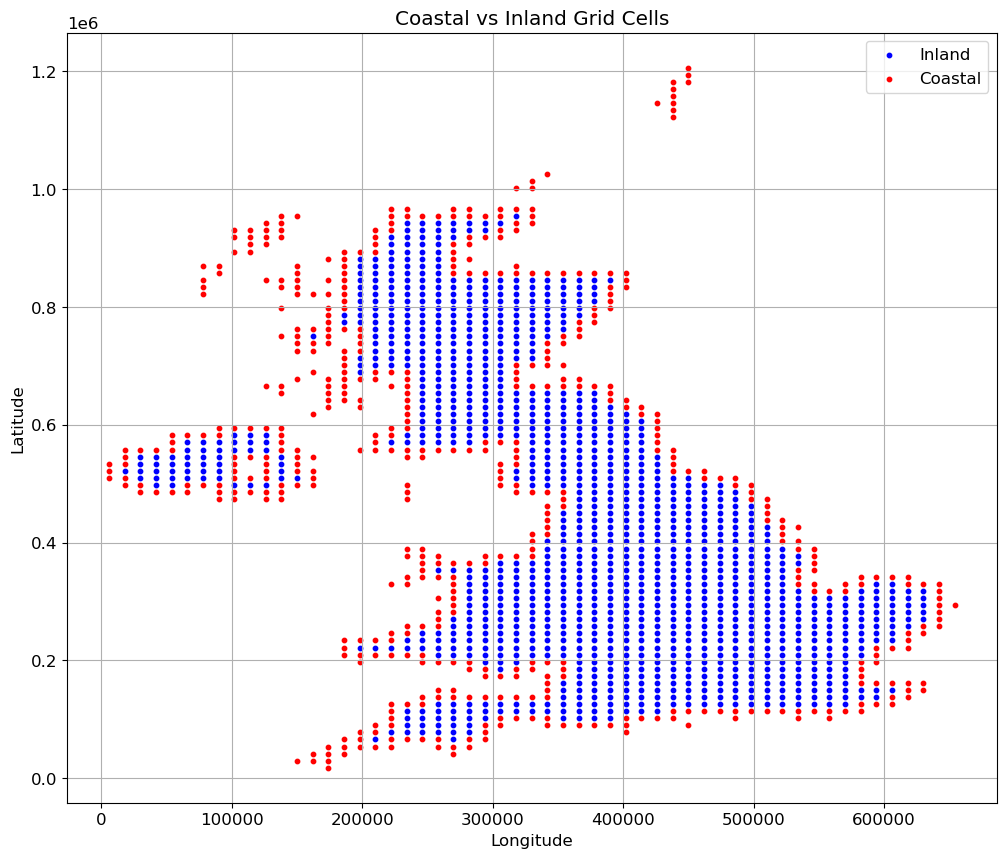

Inland Pre-1990 Slope: 0.042463
Inland Post-1990 Slope: 0.262453
Inland Pre-1990 Z-Score: 2.560057
Inland Post-1990 Z-Score: 1.391618
Inland Total Gradient (Slope): 0.060925
Inland Total Z-Score: 4.771907
Percentage change in gradient from segment pre to post-1990: 83.82%
Coastal Pre-1990 Slope: 0.084600
Coastal Post-1990 Slope: 0.256332
Coastal Pre-1990 Z-Score: 5.301803
Coastal Post-1990 Z-Score: 1.508634
Coastal Total Gradient (Slope): 0.099013
Coastal Total Z-Score: 8.202350
Percentage change in gradient from segment pre to post-1990: 67.00%
UK Average Pre-1990 Slope: 0.055496
UK Average Post-1990 Slope: 0.260560
UK Average Pre-1990 Z-Score: 3.424673
UK Average Post-1990 Z-Score: 1.434294
UK Average Total Gradient (Slope): 0.072706
UK Average Total Z-Score: 5.852226
Percentage change in gradient from segment pre to post-1990: 78.70%


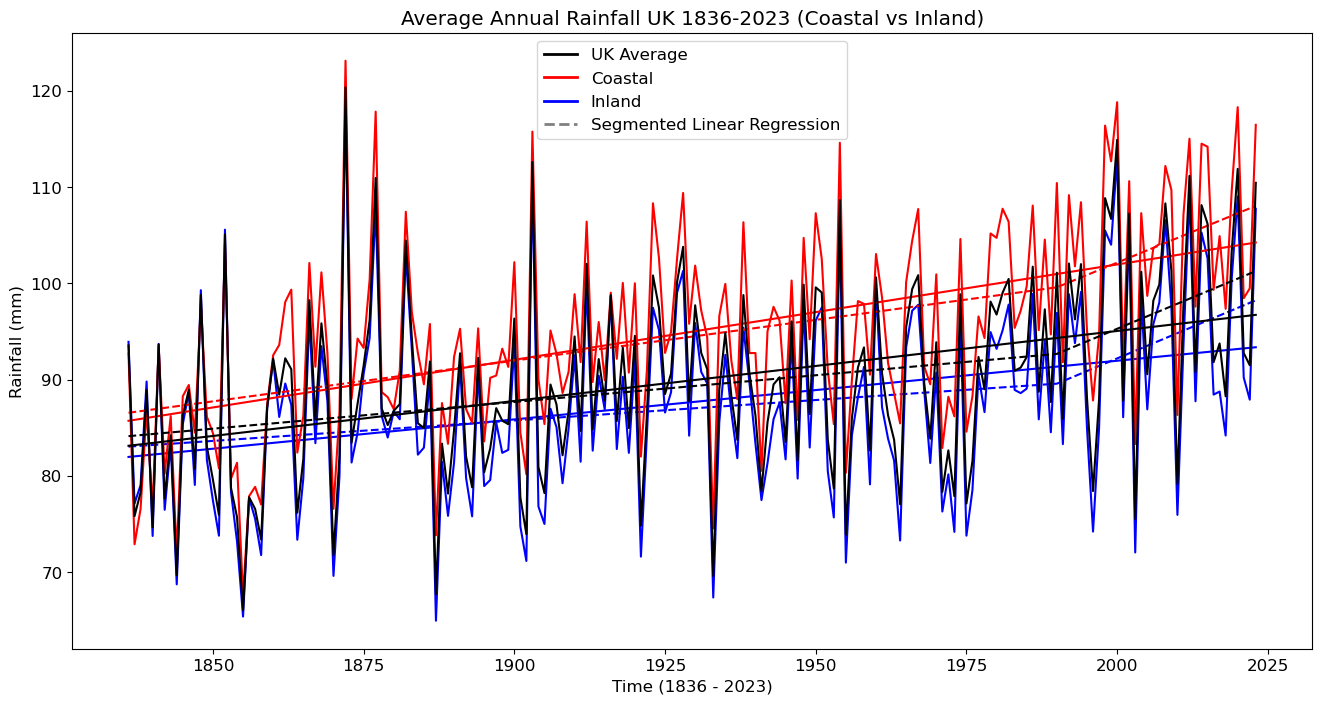

In [77]:
import numpy as np
import xarray as xr
from scipy.ndimage import convolve
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


rain_all = block_reduce(data_all_months, block_size=(12, 1, 1), func=np.mean, cval=np.nan)
nan_mask = np.isnan(rain_all[0])

kernel = np.array([[1, 1, 1],
                   [1, 0, 1],
                   [1, 1, 1]])

adjacent_nan_count = convolve(nan_mask.astype(int), kernel, mode="constant", cval=1)

inland_mask = (adjacent_nan_count == 0) & ~nan_mask

coastal_mask = (adjacent_nan_count > 0) & ~nan_mask

inland_temp = np.nanmean(rain_all[:, inland_mask], axis=1)
coastal_temp = np.nanmean(rain_all[:, coastal_mask], axis=1)
uk_avg_temp = np.nanmean(rain_all, axis=(1, 2))

time = np.arange(1836, 2024)

lons = data_temp.projection_x_coordinate.values
lats = data_temp.projection_y_coordinate.values
lon_mesh, lat_mesh = np.meshgrid(lons, lats)

plt.figure(figsize=(12, 10))
plt.scatter(lon_mesh[inland_mask], lat_mesh[inland_mask], c="blue", s=10, label="Inland")
plt.scatter(lon_mesh[coastal_mask], lat_mesh[coastal_mask], c="red", s=10, label="Coastal")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Coastal vs Inland Grid Cells")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(16, 8))
plot_with_regression(time, inland_temp, label="Inland", color="blue")
plot_with_regression(time, coastal_temp, label="Coastal", color="red")
plot_with_regression(time, uk_avg_temp, label="UK Average", color="black")

plt.xlabel('Time (1836 - 2023)')
plt.ylabel('Rainfall (mm)')
plt.title('Average Annual Rainfall UK 1836-2023 (Coastal vs Inland)')

#better way of adding a legend
legend_elements = [
    Line2D([0], [0], color='black', lw=2, label='UK Average'),
    Line2D([0], [0], color='red', lw=2, label='Coastal'),
    Line2D([0], [0], color='blue', lw=2, label='Inland'),
    
    Line2D([0], [0], color='gray', linestyle='--', lw=2, label='Segmented Linear Regression'),

]
plt.legend(handles=legend_elements)
plt.show()

## North, South, East and West

North Rainfall Average Pre-1990 Slope: 0.105252
North Rainfall Average Post-1990 Slope: 0.365549
North Rainfall Average Pre-1990 Z-Score: 4.944409
North Rainfall Average Post-1990 Z-Score: 1.393256
North Rainfall Average Total Gradient (Slope): 0.127097
North Rainfall Average Total Z-Score: 7.621304
Percentage change in gradient from segment pre to post-1990: 71.21%
South Rainfall Average Pre-1990 Slope: 0.029351
South Rainfall Average Post-1990 Slope: 0.205392
South Rainfall Average Pre-1990 Z-Score: 1.758884
South Rainfall Average Post-1990 Z-Score: 1.144329
South Rainfall Average Total Gradient (Slope): 0.044125
South Rainfall Average Total Z-Score: 3.489170
Percentage change in gradient from segment pre to post-1990: 85.71%
UK Rainfall Average Pre-1990 Slope: 0.055496
UK Rainfall Average Post-1990 Slope: 0.260560
UK Rainfall Average Pre-1990 Z-Score: 3.424673
UK Rainfall Average Post-1990 Z-Score: 1.434294
UK Rainfall Average Total Gradient (Slope): 0.072706
UK Rainfall Average Tot

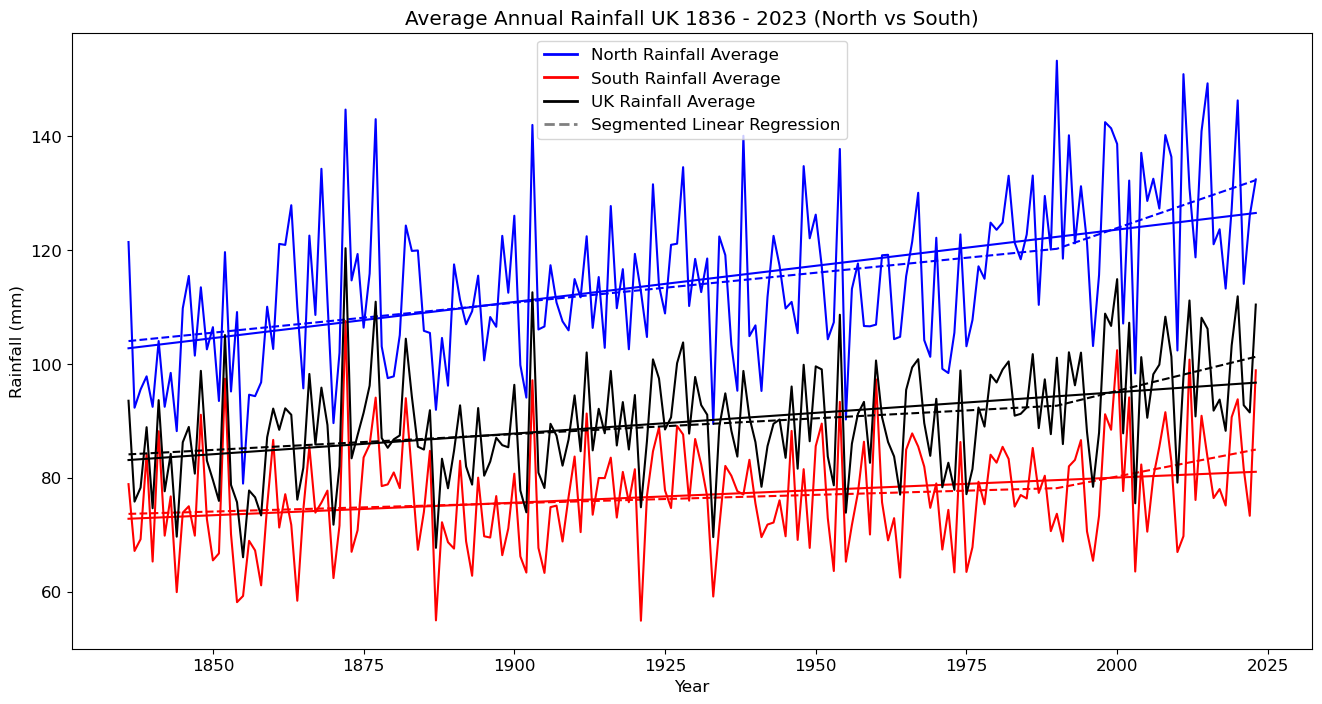

West Rainfall Average Pre-1990 Slope: 0.128604
West Rainfall Average Post-1990 Slope: 0.349499
West Rainfall Average Pre-1990 Z-Score: 5.566389
West Rainfall Average Post-1990 Z-Score: 1.245782
West Rainfall Average Total Gradient (Slope): 0.147142
West Rainfall Average Total Z-Score: 8.186177
Percentage change in gradient from segment pre to post-1990: 63.20%
East Rainfall Average Pre-1990 Slope: 0.022576
East Rainfall Average Post-1990 Slope: 0.220511
East Rainfall Average Pre-1990 Z-Score: 1.462334
East Rainfall Average Post-1990 Z-Score: 1.319961
East Rainfall Average Total Gradient (Slope): 0.039188
East Rainfall Average Total Z-Score: 3.334896
Percentage change in gradient from segment pre to post-1990: 89.76%
UK Rainfall Average Pre-1990 Slope: 0.055496
UK Rainfall Average Post-1990 Slope: 0.260560
UK Rainfall Average Pre-1990 Z-Score: 3.424673
UK Rainfall Average Post-1990 Z-Score: 1.434294
UK Rainfall Average Total Gradient (Slope): 0.072706
UK Rainfall Average Total Z-Score: 

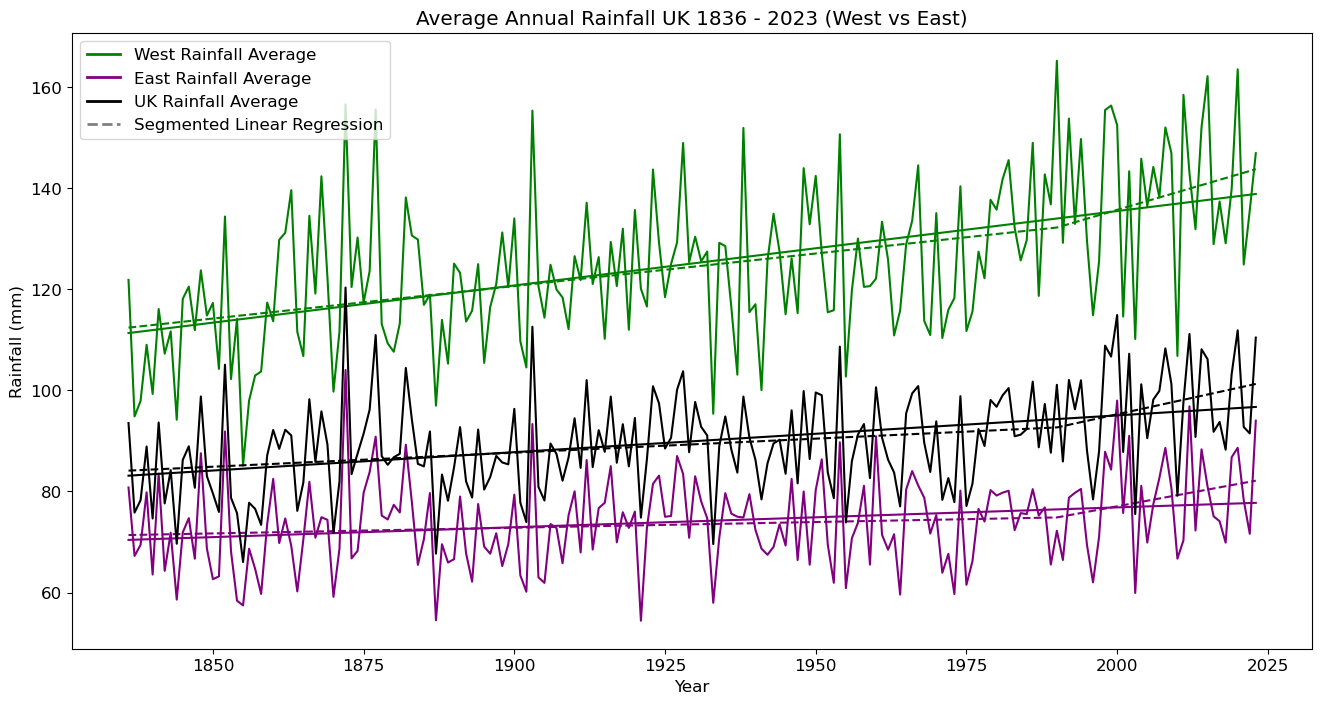

In [78]:

#same code as before but for rainfall data:
data_rain = xr.open_mfdataset(r"/Users/maxMax/Desktop/Datasets/12km/rainfall/mon/v20240514/*.nc", parallel=False)

lons = data_rain.projection_x_coordinate.values
lats = data_rain.projection_y_coordinate.values

lat_midpoint = np.mean(lats)
north_indices = lats >= lat_midpoint
south_indices = lats < lat_midpoint

rain_north = data_rain.rainfall[:, north_indices, :].mean(dim=('projection_y_coordinate', 'projection_x_coordinate'))
rain_south = data_rain.rainfall[:, south_indices, :].mean(dim=('projection_y_coordinate', 'projection_x_coordinate'))

lon_midpoint = np.mean(lons)
west_indices = lons <= lon_midpoint
east_indices = lons > lon_midpoint

rain_west = data_rain.rainfall[:, :, west_indices].mean(dim=('projection_y_coordinate', 'projection_x_coordinate'))
rain_east = data_rain.rainfall[:, :, east_indices].mean(dim=('projection_y_coordinate', 'projection_x_coordinate'))

rain_uk = data_rain.rainfall.mean(dim=('projection_y_coordinate', 'projection_x_coordinate'))

rain_north_annual = block_reduce(rain_north.values, block_size=(12,), func=np.nanmean)
rain_south_annual = block_reduce(rain_south.values, block_size=(12,), func=np.nanmean)
rain_west_annual = block_reduce(rain_west.values, block_size=(12,), func=np.nanmean)
rain_east_annual = block_reduce(rain_east.values, block_size=(12,), func=np.nanmean)
rain_uk_annual = block_reduce(rain_uk.values, block_size=(12,), func=np.nanmean)


plt.figure(figsize=(16, 8)) #north vs south
plot_with_regression(time, rain_north_annual, 'blue', 'North Rainfall Average')
plot_with_regression(time, rain_south_annual, 'red', 'South Rainfall Average')
plot_with_regression(time, rain_uk_annual, 'black', 'UK Rainfall Average')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.title('Average Annual Rainfall UK 1836 - 2023 (North vs South)')
legend_elements = [
    Line2D([0], [0], color='blue', lw=2, label='North Rainfall Average'),
    Line2D([0], [0], color='red', lw=2, label='South Rainfall Average'),
    Line2D([0], [0], color='black', lw=2, label='UK Rainfall Average'),
    Line2D([0], [0], color='gray', linestyle='--', lw=2, label='Segmented Linear Regression')
]
plt.legend(handles=legend_elements)
plt.show()

plt.figure(figsize=(16, 8)) #west vs east
plot_with_regression(time, rain_west_annual, 'green', 'West Rainfall Average')
plot_with_regression(time, rain_east_annual, 'purple', 'East Rainfall Average')
plot_with_regression(time, rain_uk_annual, 'black', 'UK Rainfall Average')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.title('Average Annual Rainfall UK 1836 - 2023 (West vs East)')
legend_elements = [
    Line2D([0], [0], color='green', lw=2, label='West Rainfall Average'),
    Line2D([0], [0], color='purple', lw=2, label='East Rainfall Average'),
    Line2D([0], [0], color='black', lw=2, label='UK Rainfall Average'),
    Line2D([0], [0], color='gray', linestyle='--', lw=2, label='Segmented Linear Regression')
]
plt.legend(handles=legend_elements)
plt.show()